In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath

In [3]:
paths = dict([(a,"/home/jsk/cylinder/fixed_surfaces/k8a"+str(a)) for a in range(10)])

In [4]:
k=.8

In [5]:
alphas =[x for x in range(-5,2)]
cs =[x for x in np.arange(.5,9,1)]

In [6]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data


In [7]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))
    
def complex_heatmap_2(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    return data.transpose()

In [8]:
field_energies = dict([(a,sort_csv(os.path.join(paths[a], "field_energy.csv"), dtype=complex)) for a in paths])

In [9]:
minimum_as = dict([])
minimum_Es = dict([])
for alpha in alphas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for c in cs:
        energies = [(field_energies[a].loc[c, alpha],a) for a in paths]
        energy, a = min(energies)
        minimum_as_row[c]= a
        minimum_Es_row[c] = energy
    minimum_as[alpha]=minimum_as_row
    minimum_Es[alpha] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)

<AxesSubplot:>

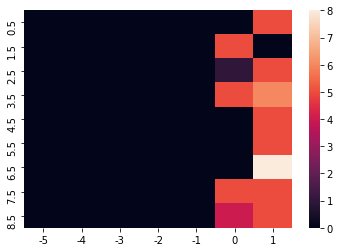

In [10]:
sb.heatmap(minimum_as)

<AxesSubplot:>

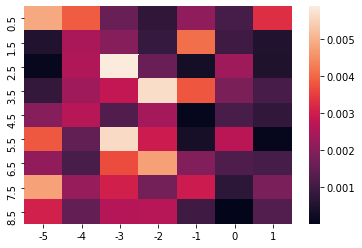

In [11]:
sb.heatmap(minimum_Es)

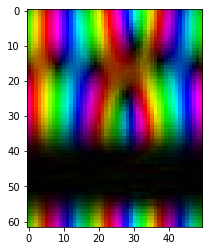

In [12]:
complex_heatmap(os.path.join(paths[9],"alpha_-5.0_C_3.5_snapshot.csv"))

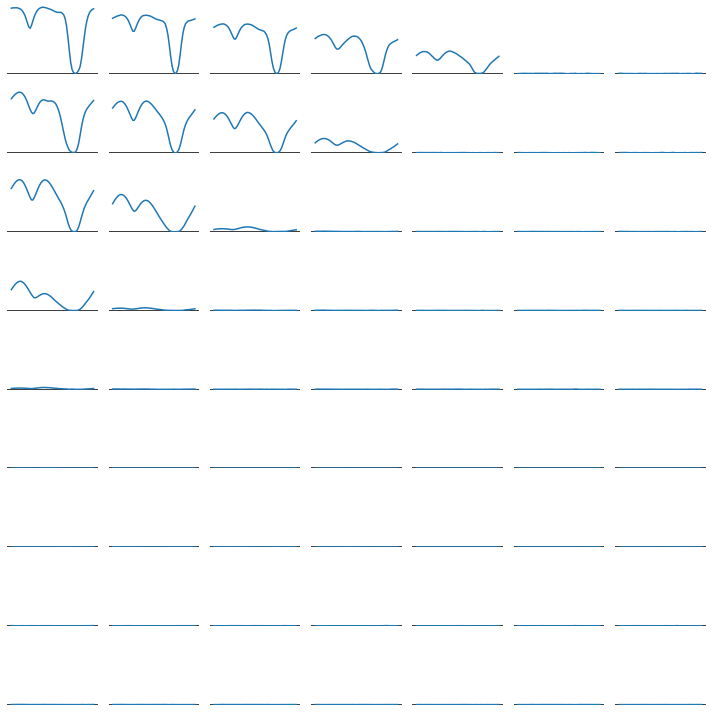

In [13]:
nrows, ncols = field_energies[8].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

a=8

for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas ]):
    alpha,c= params
    #print(params)
    filename="alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_profile_abs.csv"
    #print(filename)
    profile= pd.read_csv(os.path.join(paths[a], filename), index_col=0)
    ax.set_ylim((0,math.sqrt(5)))
    ax.axis('off')
    ax.axhline(y=0, color='black')
    ax.plot(profile)
    #plt.show()

plt.tight_layout()
#pp.savefig()
plt.show()
#pp.close()

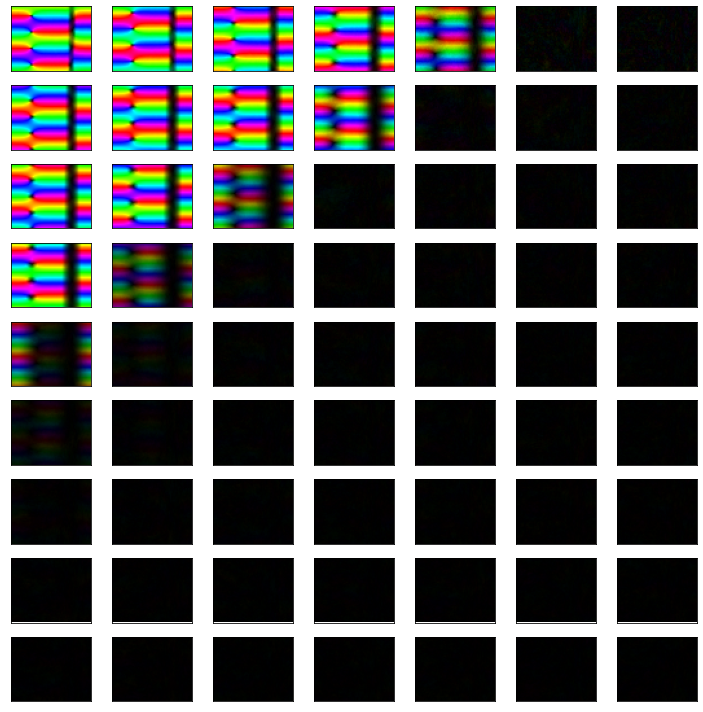

In [14]:
nrows, ncols = field_energies[8].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

a=6

for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas ]):
    alpha,c= params
    #print(params)
    filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
    #print(filename)
    heatmap= complex_heatmap_2(filename)
    ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=1))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#pp.savefig()
plt.show()
#pp.close()

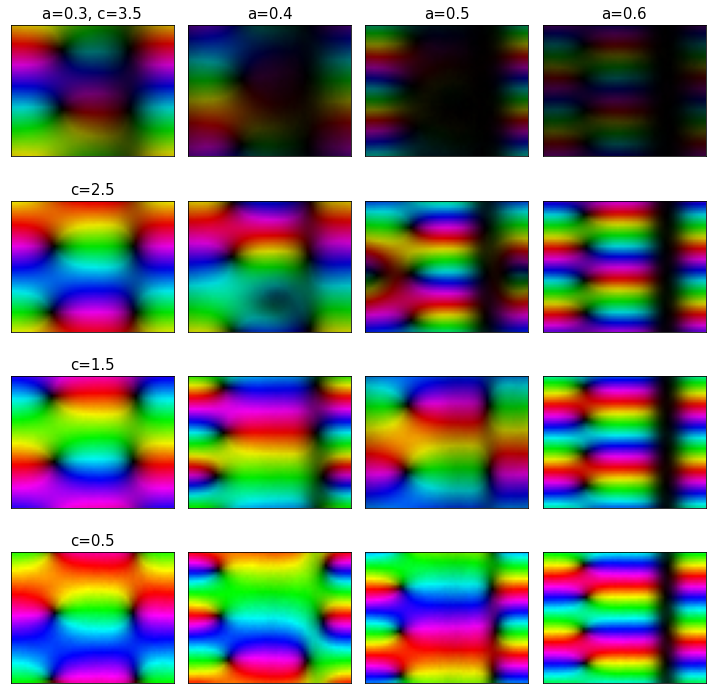

In [37]:
nrows, ncols = (4,4)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

alpha=-4
a_s=[3,4,5,6]
c_s=cs[:4][::-1]

for ax, params in zip(axs.flat, [(a,c) for c in c_s for a in a_s]):
    a,c= params
    #print(params)
    filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
    #print(filename)
    heatmap= complex_heatmap_2(filename)
    ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=2))
    if c==3.5 and a==3:
        ax.set_title("a="+str(a/10)+", c="+str(c), fontsize=15)
    elif c==3.5:
        ax.set_title("a="+str(a/10), fontsize=15)
    elif a==3:
        ax.set_title("c="+str(c), fontsize=15)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#pp.savefig()
#plt.show()
#pp.close()
#plt.savefig("k8_a3to6_reversec.png")

In [16]:
#entering states by hand
descriptions = dict([])
descriptions[8] = [[(3,2),2,2,(2,3),2,'x','x'], [(2,3),2,2,2,'x','x','x'],
                  [2,2,2,'x','x','x','x'], [2,2,'x','x','x','x','x'],
                   [2,'x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]

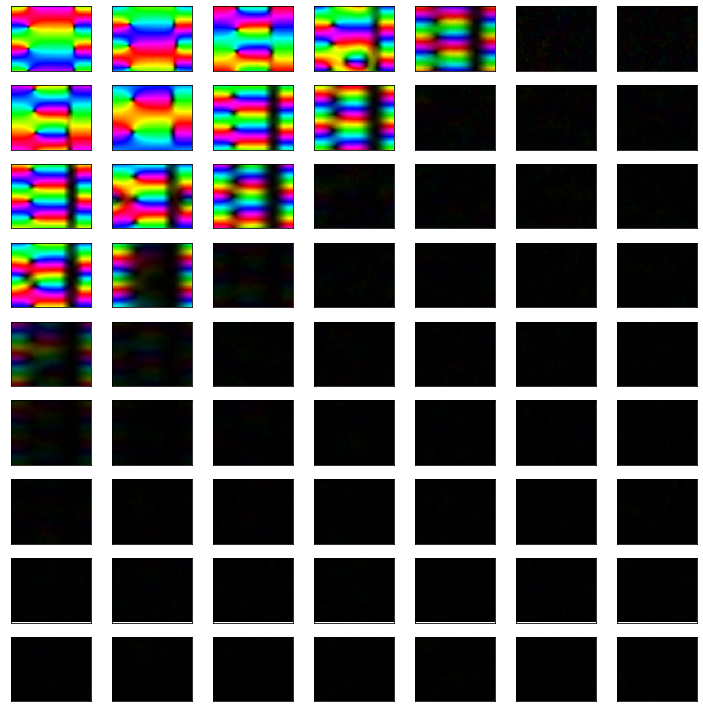

In [17]:
nrows, ncols = field_energies[8].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

a=5

for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas ]):
    alpha,c= params
    #print(params)
    filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
    #print(filename)
    heatmap= complex_heatmap_2(filename)
    ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=1))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#pp.savefig()
plt.show()
#pp.close()

Text(0.5, 0, 'a')

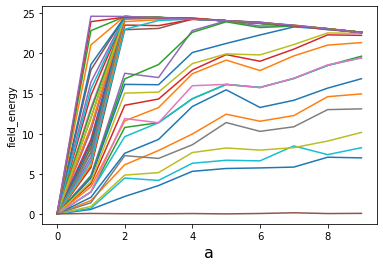

In [18]:
a_s = range(10)
alpha_=-4
for alpha,c in [(alpha,c) for alpha in alphas[:-2] for c in cs]:
    plt.plot(a_s, [field_energies[a].loc[c,alpha]/alpha**2 for a in a_s], label="c="+str(c))
plt.plot(a_s, [field_energies[a].loc[0.5,1] for a in a_s], label="unordered")
#plt.legend(fontsize=10)
plt.ylabel("field_energy")
plt.xlabel("a", fontsize=16)

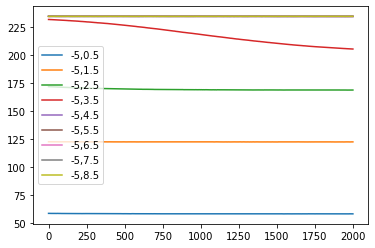

In [19]:
p=paths[7]
subject="field_energy"
for alpha in alphas[:1]:
    for c in cs[:]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+str(alpha)+".0_C_"+str(c)+".csv")
            plt.plot([complex(x).real*.4 for x in time_data.loc[3000:,subject]], label=str(alpha)+','+str(c))
        except FileNotFoundError:
            print(p+"/alpha_"+str(alpha)+".0_C_"+str(c)+".csv")
            pass
plt.legend()
plt.show()

## I want to view field energy per surface area

In [20]:
import pandas as pd
import seaborn as sb
import surfaces_and_fields.system_cylinder as cylinder

In [21]:
a_s = np.arange(0, 1, .1)
ks = np.arange(0.2, 1.3, .1)

In [22]:
firsttime = True
if firsttime:
    surfenergy = {}
    for k in ks:
        surfenergya={}
        print(round(k,4))
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
        for a in a_s:
            energy=cy.evaluate_A_integral_0(amplitude=a)#*math.pi*2
            surfenergya[round(a,2)]=energy
        surfenergy[round(k,4)]=surfenergya
    #print(surfenergy)
    surfdatatens = pd.DataFrame(surfenergy)
    print(surfdata)
    surfdatatens.to_csv("chapter2data/surfenergytens_tmp.csv")
else:
    surfdatatens=pd.read_csv("chapter2data/surfenergytens.csv", index_col=0)
print(surfdata)

0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2


NameError: name 'surfdata' is not defined

Here I saved surfa ce area as a function of k, a

In [ ]:
surfdatatens.loc[:,.8]

In [ ]:
a_s=range(10)
k=.8
for alpha,c in [(alpha,c) for alpha in alphas[:1] for c in cs[:]]:
    plt.plot(a_s, [field_energies[a].loc[c,alpha]/surfdatatens.loc[a/10,k] for a in a_s], label="c"+str(c))
plt.legend(fontsize=10)
plt.ylabel("field_energy density", fontsize=16)
plt.xlabel("a", fontsize=16)

In [ ]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=30
for alpha in alphas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for c in cs:
        energies = [(field_energies[a].loc[c, alpha]+gamma*surfdatatens.loc[a/10,k],a) for a in paths]
        energy, a = min(energies)
        minimum_as_row[c]= a
        minimum_Es_row[c] = energy
    minimum_as[alpha]=minimum_as_row
    minimum_Es[alpha] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as)

In [11]:
surfdatatens=pd.read_csv("chapter2data/surfenergytens.csv", index_col=0)
surfdatatens

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2
0.0,31.415927,20.943951,15.707963,12.566371,10.471976,8.975979,7.853982,6.981317,6.283185,5.711987,5.235988
0.1,31.340798,20.896463,15.675075,12.542864,10.455242,8.964527,7.846878,6.977940,6.283098,5.714871,5.241606
0.2,31.118597,20.755887,15.577570,12.473002,10.405300,8.930086,7.825168,6.967105,6.281832,5.722216,5.256835
0.3,30.758515,20.527687,15.418832,12.358730,10.322969,8.872507,7.787817,6.946938,6.276688,5.730493,5.277303
0.4,30.274725,20.220337,15.204171,12.203193,10.209704,8.791816,7.733573,6.914987,6.264059,5.734965,5.297151
0.5,29.684931,19.844510,14.940386,12.010563,10.067667,8.688504,7.661452,6.868928,6.240368,5.730861,5.310462
0.6,29.008736,19.412145,14.635234,11.785805,9.899717,8.563716,7.571137,6.807146,6.202826,5.714318,5.312379
0.7,28.266115,18.935550,14.296890,11.534372,9.709301,8.419308,7.463161,6.729042,6.149849,5.682881,5.299679
0.8,27.476153,18.426637,13.933444,11.261889,9.500265,8.257752,7.338890,6.635069,6.081123,5.635594,5.270860
0.9,26.656162,17.896361,13.552515,10.973856,9.276619,8.081942,7.200349,6.526564,5.997432,5.572792,5.225903


In [17]:
straightfieldenergy=pd.read_csv("chapter2data/straightfieldenergy.csv", index_col=0)
straightfieldenergy
curvdatatens=pd.read_csv("chapter2data/curvenergytens.csv", index_col=0)
curvdatatens

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3
0.0,31.415927,20.943951,15.707963,12.566371,10.471976,8.975979,7.853982,6.981317,6.283185,5.711987,5.235988,4.833219
0.1,31.650140,21.098152,15.822232,12.657261,10.548325,9.043420,7.916638,7.042551,6.345975,5.779127,5.310211,4.917264
0.2,32.371212,21.573000,16.174124,12.937022,10.782972,9.250049,8.107614,7.227809,6.534152,5.978169,5.527714,5.160677
0.3,33.639531,22.408611,16.793442,13.428978,11.194490,9.610419,8.437592,7.543614,6.849429,6.305021,5.877276,5.543436
0.4,35.575572,23.685043,17.739758,14.179990,11.820653,10.154971,8.930390,8.007205,7.302016,6.762036,6.352247,6.048503
0.5,38.402752,25.550793,19.123761,15.277568,12.732848,10.942697,9.634606,8.657778,7.922079,7.370313,6.964386,6.677882
0.6,42.550120,28.291126,21.158392,16.890730,14.070157,12.090510,10.649624,9.580096,8.781649,8.190441,7.763773,7.471887
0.7,48.934216,32.515643,24.299205,19.382007,16.132464,13.852883,12.195183,10.966229,10.050066,9.372662,8.884348,8.550412
0.8,59.950806,39.818514,29.738594,23.701893,19.708249,16.901908,14.855510,13.331598,12.187361,11.331466,10.702554,10.257709
0.9,85.146511,56.555887,42.235049,33.648390,27.953683,23.934094,20.981421,18.757426,17.058567,15.754663,14.758317,14.008500


(0.0, 410.0)

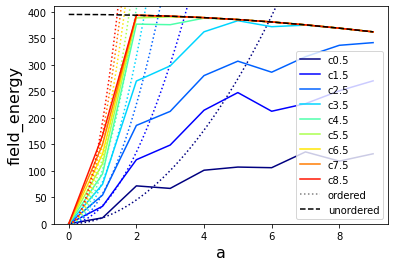

In [15]:
c_s=cs
n=6
a_s = range(10)
cols=plt.cm.jet([i/len(cs) for i in range(len(c_s))]) 
fine_as=np.arange(0,9.05,.1)
for i,(alpha,c) in enumerate([(alpha,c) for alpha in [-4] for c in c_s]):
    plt.plot(a_s, [field_energies[a].loc[c,alpha] for a in a_s], label="c"+str(c), color=cols[i])
    plt.plot(fine_as, [n**2*c*abs(alpha)*straightfieldenergy.loc[round(a/10, 5), str(k)]*2*math.pi for a in fine_as], color=cols[i],linestyle=':')
plt.plot([0], [-1], label="ordered", 
         linestyle = ':',color='gray')
plt.plot(a_s, [.5*alpha**2*surfdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="unordered", 
         linestyle = '--',color='black')
plt.legend(fontsize=10)
plt.ylabel("field_energy", fontsize=16)
plt.xlabel("a", fontsize=16)
plt.ylim((0,410))
#plt.xlim((0,5))
#plt.savefig("k8_n6_energy_landscapes.png")

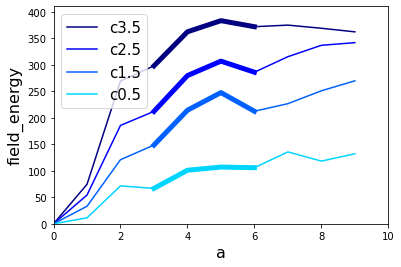

In [29]:
c_s=cs[:4]
n=6
a_s1 = range(3,7)
a_s=range(10)
cols=plt.cm.jet([i/len(cs) for i in range(len(c_s))]) 
fine_as=np.arange(0,9.05,.1)
for i,(alpha,c) in enumerate([(alpha,c) for alpha in alphas[1:2] for c in c_s[::-1]]):
    plt.plot(a_s1, [field_energies[a].loc[c,alpha] for a in a_s1], color=cols[i], linewidth=5)
    plt.plot(a_s, [field_energies[a].loc[c,alpha] for a in a_s], label="c"+str(c), color=cols[i], linestyle='-')
plt.legend(fontsize=15)
plt.ylabel("field_energy", fontsize=16)
plt.xlabel("a", fontsize=16)
plt.ylim((0,410))
plt.xlim((0,10))
#plt.savefig("k8_n6_excerpt_energy_landscapes.png")

(0.0, 1.0)

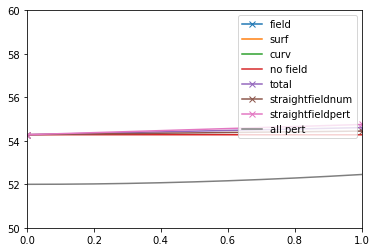

In [39]:
# plot one of th mysteriously stable energy landscapes, k=.9 c=1.5 alpha=-4, field coeffs ~.01 gamma 
# field energy from simulation plus (numerially integrated) surace and curvature energy
alpha=-4
c=1.5
field_factor=.01
gamma=1
kappa=.1
plt.plot(a_s, [field_factor*field_energies[a].loc[c,alpha] for a in a_s], label="field",marker='x')
plt.plot(a_s, [gamma*surfdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="surf")
plt.plot(a_s, [kappa*curvdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="curv")

plt.plot(a_s, [gamma*surfdatatens.loc[a/10, str(k)]*2*math.pi+
               kappa*curvdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="no field")
plt.plot(a_s, [field_factor*field_energies[a].loc[c,alpha]+gamma*surfdatatens.loc[a/10, str(k)]*2*math.pi+
               kappa*curvdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="total",marker='x')
plt.plot(a_s, [field_factor*n**2*c*abs(alpha)/2*straightfieldenergy.loc[round(a/10, 5), str(k)]*2*math.pi+gamma*surfdatatens.loc[a/10, str(k)]*2*math.pi+
               kappa*curvdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="straightfieldnum",marker='x')
plt.plot(a_s, [field_factor*n**2*c*abs(alpha)/2*2*math.pi*2*math.pi/.9*(a/10)**2+gamma*surfdatatens.loc[a/10, str(k)]*2*math.pi+
               kappa*curvdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="straightfieldpert",marker='x')
area=2*math.pi*2*math.pi/.9
plt.plot(fine_as, [field_factor*n**2*c*abs(alpha)/2*area*(a/10)**2+gamma/4*(k**2-1)*area*(a/10)**2+
               kappa/8*(2*k**4-k**2+3)*area*(a/10)**2 + 52 for a in fine_as], label="all pert")
plt.legend()
plt.ylim((50,60))
plt.xlim((0,1))

Result: with field it has a clear minimum at a=0 in all versions and approximations including just 1st order energy difference of all three terms (line "all pert").  There is something wrong with the line k_c i'm plotting, which ought to separate "all pert" has a minimum/maximum at a=0

In [40]:
print([field_factor*n**2*c*abs(alpha)/2*area*(a/10)**2+gamma/4*(k**2-1)*area*(a/10)**2+
               kappa/8*(2*k**4-k**2+3)*area*(a/10)**2 + 54.2 for a in [0,0.001, 0.01, .1]])

[54.2, 54.200000451694514, 54.20004516945083, 54.20451694508266]


(Perturbative energy difference definitely increasing, does not have an imperceptible local maximum at a=0)